## Importing needed packages


In [1]:
import pandas as pd
import numpy as np
import requests
import json
import time
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Gathering & testing gathering process

#### Reading Twitter Archive Enhanced data

In [2]:
# Supplied file
t_archive = pd.read_csv('twitter-archive-enhanced.csv')
t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Downloading the Tweet image prediction programmaticly

In [3]:
# Requesting tweet image predictions
with open('image_predictions.tsv' , 'wb') as file:
    image_predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))
    file.write(image_predictions.content)

In [4]:
# Reading image predictions
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

### Twitter API data 

In [5]:
# Converting the txt file to data list where each element (line) contains one piece of tweet info
df_list = []
with open('tweet-json') as file:
    for line in file:
        df_list.append(json.loads(line))
        

In [6]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [7]:
tweet_data = pd.DataFrame(df_list,columns = ['id','retweet_count','favorite_count'])
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [8]:
# Changing id column name to be tweet_id in order to be more descriptive
tweet_data = tweet_data.rename(columns = {'id':'tweet_id'})

In [9]:
# saving the data into a csv file for future use
tweet_data.to_csv('tweet_data.csv',index = False)

In [10]:
# checking the file was saver correctly
x = pd.read_csv('tweet_data.csv')
x.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing data 

### Twitter Archive Enhanced data

### Visualy

In [11]:
t_archive.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719991154...,10,10,None,doggo,None,None,None
954,751793661361422336,NaN,NaN,2016-07-09 15:02:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Fred. He's having one heck of a summer...,NaN,NaN,NaN,https://vine.co/v/5W5YHdTJvaV,11,10,Fred,None,None,None,None
1864,675362609739206656,NaN,NaN,2015-12-11 17:12:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She loves that shoe. Still no s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675362609...,12,10,Daisy,None,None,None,None
2177,669037058363662336,NaN,NaN,2015-11-24 06:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Pancho and Peaches. Pancho is a C...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669037058...,10,10,None,None,None,None,None
1065,740711788199743490,NaN,NaN,2016-06-09 01:07:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing the touchdown of a pupn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740711788...,9,10,None,None,None,None,None
1727,679877062409191424,NaN,NaN,2015-12-24 04:11:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She's a bacon frise. Total babe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679877062...,5,10,Penelope,None,None,None,None
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
1934,674014384960745472,NaN,NaN,2015-12-07 23:55:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Aiden. His eyes are magical. Love...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674014384...,11,10,Aiden,None,None,None,None
147,863432100342583297,NaN,NaN,2017-05-13 16:33:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Belle. She's never been more pupset. E...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863432100...,12,10,Belle,None,None,None,None
1933,674019345211760640,NaN,NaN,2015-12-08 00:15:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Acro. You briefly see her out of the c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674019345...,10,10,Acro,None,None,None,None


### Programmaticly

In [12]:
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
t_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
# Checking the values of each column to get an intuition of our data
for col in t_archive.columns:
    print('For column {} :'.format(col))
    print(t_archive[col].value_counts())
    print('='*50)

For column tweet_id :
749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728

In [16]:
t_archive['text'][t_archive['rating_denominator'] == 0 ]


313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object

In [17]:
t_archive[t_archive['rating_denominator'] < 10 ]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [18]:
t_archive[t_archive['rating_denominator'] > 10 ]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [19]:
t_archive[t_archive['rating_numerator'] == 0 ]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [20]:
t_archive[t_archive['name'].apply(len) <= 2]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [21]:
len(t_archive[t_archive['name'].apply(len) <= 2])


79

In [22]:
assert [t_archive.duplicated() == False]

#### no duplicated columns

## Assessing image_predictions data

### Visualy

In [23]:
image_predictions.sample(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
90,667538891197542400,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1,Yorkshire_terrier,0.618957,True,silky_terrier,0.300313,True,Australian_terrier,0.053412,True
1237,746790600704425984,https://pbs.twimg.com/media/Cl0iFdeXEAQtPyT.jpg,3,Boston_bull,0.936183,True,guinea_pig,0.010084,False,Cardigan,0.010077,True
1820,834458053273591808,https://pbs.twimg.com/media/C5SXK89XUAQg7GX.jpg,1,Rhodesian_ridgeback,0.468619,True,whippet,0.177531,True,redbone,0.106552,True
1280,750132105863102464,https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg,1,toy_poodle,0.478018,True,miniature_poodle,0.207458,True,croquet_ball,0.085879,False
1185,738885046782832640,https://pbs.twimg.com/media/CkEMBz9WYAAGLaa.jpg,1,bath_towel,0.878320,False,swab,0.020633,False,American_Staffordshire_terrier,0.015535,True
1265,749317047558017024,https://pbs.twimg.com/ext_tw_video_thumb/74931...,1,wire-haired_fox_terrier,0.155144,True,Lakeland_terrier,0.108382,True,buckeye,0.074617,False
1449,776201521193218049,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True
35,666437273139982337,https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg,1,Chihuahua,0.671853,True,beagle,0.124680,True,Saluki,0.044094,True
1052,714141408463036416,https://pbs.twimg.com/media/Cekj0qwXEAAHcS6.jpg,1,Labrador_retriever,0.586951,True,golden_retriever,0.378812,True,redbone,0.003605,True
394,673612854080196609,https://pbs.twimg.com/media/CVknUTlVEAARjU5.jpg,1,Newfoundland,0.223101,True,Leonberg,0.111106,True,shovel,0.085626,False


## Programmaticly

In [24]:
for col in image_predictions.columns:
    print('For column {} :'.format(col))
    print(image_predictions[col].value_counts())
    print('='*50)

For column tweet_id :
685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976

In [25]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
assert [image_predictions.duplicated() == False]

#### no duplicated rows

## Tweet Data

In [28]:
tweet_data.sample(100)

,tweet_id,retweet_count,favorite_count
2156,669573570759163904,156,467
1503,691793053716221953,4732,8910
933,753398408988139520,2186,6384
1107,733828123016450049,881,3926
204,852912242202992640,2037,9658
1066,740373189193256964,9220,20648
439,819924195358416896,5607,14305
2349,666049248165822465,41,111
2270,667491009379606528,242,559
2348,666050758794694657,60,136


In [29]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [14]:
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [15]:
assert [tweet_data.duplicated() == False]

#### No duplicates found

## Tidiness Issues or structural issues
* Our data are divided into 3 tabels making it difficult for analysing each and every one individualy
* There should be one column representing which stage of the dog instead of four different columns for each dog stage

## Quality Issues
#### t_archive dataframe

* The content in source column is not readable.
* Incorrect data type in timestamp, tweet_id better to be a string , dog_stage should be category 
* in_reply_to_status_id , in_reply_to_user_id columns most of their values are missing and thus not needed for analasys
* There are 181 retweets which need to be removed , 78 tweet replies which need to be removed  


* rating_numerator and rating_denominator have incorrect values such as values less than 10 for the numerators and for denominators there are some unusual values like 50 , 170 etc which should be looked up manualy 

* Data frame have 'None' values wich should be converted to np.nan in order to be understandable by python and can deal with it in analysis process
* text column has 'URL' among its content so better to be extracted and put in a seperate column as it can be a useful piece of information 

#### image_predictions dataframe

* p1_conf, p2_conf and p3_conf columns should be merged
* p1_dog, p2_dog and p3_dog columns should be merged

## Cleaning
#### Cleaning data is the third step in data wrangling

#### First making a copy of each data frame in order to keep the original ones for any case

In [16]:
#copy dataframes
clean_t_archive = t_archive.copy()
clean_image_predictions= image_predictions.copy()
clean_tweet_data = tweet_data.copy()

#### Our data are divided into 3 tabels making it difficult for analysing each and every one individualy . better to have one main table for all the data 


### Define
#### Merging the 3 dataframes into one.

### Code

In [17]:

clean_t_archive = pd.merge(left = clean_t_archive,
                                 right=clean_tweet_data, left_on='tweet_id', right_on='tweet_id', how='inner')

In [18]:
clean_t_archive = clean_t_archive.merge(clean_image_predictions, on='tweet_id', how='inner')


### Test

In [19]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073 

### Test

#### There should be one column representing which stage of the dog instead of four different columns for each dog stage

### Define
#### Extract dog stage from text column into new dog_stage column

### Code

In [30]:
clean_t_archive['dog_stage'] = clean_t_archive['text'].str.extract('(puppo|pupper|floofer|doggo)',expand = True)

In [31]:

# Checking for entries labelled with multiple categories

multi_cat_list = []

for i in range(0, len(clean_t_archive.index)):
    if clean_t_archive.doggo[i] == 'doggo' and (clean_t_archive.floofer[i] == 'floofer' \
                                                   or clean_t_archive.pupper[i] == 'pupper'\
                                                   or clean_t_archive.puppo[i] == 'puppo'):
        multi_cat_list.append(i)

print(multi_cat_list)
print(len(multi_cat_list))

[154, 160, 366, 429, 457, 464, 566, 627, 665, 722, 780, 871, 917]
13


### 13 cases of multiple categories found 
#### Checking text of entry to correct category to correct values

In [32]:
# Index 154   
clean_t_archive.loc[154, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo        doggo
floofer       None
pupper        None
puppo        puppo
dog_stage    puppo
Name: 154, dtype: object

In [33]:
# Checking the text of that tweet to decide which stage for that dog
clean_t_archive.text[154]

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

#### correclty labelled as "puppo" so nothing to change

In [34]:
clean_t_archive.loc[160, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo          doggo
floofer      floofer
pupper          None
puppo           None
dog_stage      doggo
Name: 160, dtype: object

In [35]:
# Checking the next one tweet No 160
clean_t_archive.text[160]

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

#### Uncorrectly labeled as ''doggo'' while it should be ''Floofer''

In [36]:
## Correcting the value to be floofer 
clean_t_archive.loc[160, 'dog_stage'] = 'floofer'

In [37]:
# Checking tweet No 366
clean_t_archive.loc[366, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo         doggo
floofer        None
pupper       pupper
puppo          None
dog_stage     doggo
Name: 366, dtype: object

In [38]:
# Checking the tweet's text to decide
clean_t_archive.text[366]

'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'

#### Incorrectly labelled as doggo and it should be labeled as 'pupper

In [39]:
# Correcting it's value 
clean_t_archive.loc[366, 'dog_stage'] = 'pupper'

In [40]:
# Checking tweet No 429
clean_t_archive.loc[429, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo         doggo
floofer        None
pupper       pupper
puppo          None
dog_stage    pupper
Name: 429, dtype: object

In [41]:
# Checking tweet's text
clean_t_archive.text[429]


'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho'

#### Multible dog stages

In [42]:
# Changing it's value to be 'multible'
clean_t_archive.loc[429, 'dog_stage'] = 'multible'

In [43]:
# Checking tweet No 457
clean_t_archive.loc[457, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo         doggo
floofer        None
pupper       pupper
puppo          None
dog_stage     doggo
Name: 457, dtype: object

In [44]:
#Checking the text
clean_t_archive.text[457]

'Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze'

#### Multible dog stage

In [45]:
# Changing the value to be 'multible'
clean_t_archive.loc[457, 'dog_stage'] = 'multible'

In [46]:
# Checking tweet No 464
clean_t_archive.loc[464, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo         doggo
floofer        None
pupper       pupper
puppo          None
dog_stage     doggo
Name: 464, dtype: object

In [47]:
# Checking the text
clean_t_archive.text[464]

"This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj"

#### It's a Pupper not a doggo

In [48]:
# Changing the type
clean_t_archive.loc[464, 'dog_stage'] = 'pupper'

In [49]:
# Checking tweet No 566
clean_t_archive.loc[566, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo         doggo
floofer        None
pupper       pupper
puppo          None
dog_stage     doggo
Name: 566, dtype: object

In [50]:
# Checking the text of the tweet
clean_t_archive.text[566]

"This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd"

#### Already correct

In [51]:
# Checking tweet No 627
clean_t_archive.loc[627, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo         doggo
floofer        None
pupper       pupper
puppo          None
dog_stage     doggo
Name: 627, dtype: object

In [52]:
# Checking the text
clean_t_archive.text[627]

'RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

#### This is a retweet will be removed later

In [53]:
# Checking tweet No 665
clean_t_archive.loc[665, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo         doggo
floofer        None
pupper       pupper
puppo          None
dog_stage    pupper
Name: 665, dtype: object

In [54]:
# Checking the text 
clean_t_archive.text[665]

'RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC'

#### That's a retweet as well 

In [55]:
# Checking tweet No 722
clean_t_archive.loc[722, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo         doggo
floofer        None
pupper       pupper
puppo          None
dog_stage     doggo
Name: 722, dtype: object

In [56]:
# Checking text
clean_t_archive.text[722]

'Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll'

#### Multible dog stage

In [57]:
clean_t_archive.loc[722, 'dog_stage'] = 'multible'

In [58]:
# Checking tweet No 780
clean_t_archive.loc[780, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo         doggo
floofer        None
pupper       pupper
puppo          None
dog_stage     doggo
Name: 780, dtype: object

In [59]:
# Checking the text
clean_t_archive.text[780]

"Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8"

#### Not specified 

In [60]:
clean_t_archive.loc[780, 'dog_stage'] = 'None'

In [61]:
clean_t_archive.loc[780, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo         doggo
floofer        None
pupper       pupper
puppo          None
dog_stage      None
Name: 780, dtype: object

In [62]:
clean_t_archive.loc[871, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo         doggo
floofer        None
pupper       pupper
puppo          None
dog_stage    pupper
Name: 871, dtype: object

In [63]:
# Checking text
clean_t_archive.text[871]

'This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC'

#### Multible dog stage

In [64]:
clean_t_archive.loc[871, 'dog_stage'] = 'multible'

In [65]:
# Checking tweet 917
clean_t_archive.loc[917, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo         doggo
floofer        None
pupper       pupper
puppo          None
dog_stage     doggo
Name: 917, dtype: object

In [66]:
# Checking text
clean_t_archive.text[917]

'Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

#### Multible 

In [67]:
clean_t_archive.loc[917, 'dog_stage'] = 'multible'

In [68]:
# dropping original dog category columns

# Test
drop_cats = ['doggo', 'floofer', 'pupper', 'puppo']
clean_t_archive.drop(drop_cats, axis=1, inplace=True)
clean_t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


In [69]:
clean_t_archive.dog_stage.value_counts()

pupper      230
doggo        68
puppo        29
multible      5
floofer       4
None          1
Name: dog_stage, dtype: int64

#### There are 181 retweets which need to be removed , 78 tweet replies which need to be removed  


### Define

#### Drop those rows

In [70]:
#There are 181 retweets which need to be removed.

clean_t_archive.drop(clean_t_archive[clean_t_archive.retweeted_status_id.notnull()].index, inplace = True)

### Test

In [71]:
clean_t_archive.retweeted_status_id.notnull().sum()

0

In [72]:
#There are 78 tweet replies which need to be removed. 

clean_t_archive.drop(clean_t_archive[clean_t_archive.in_reply_to_status_id.notnull()].index, inplace = True)

### Test

In [73]:
clean_t_archive.in_reply_to_status_id.notnull().sum()

0

#### The content in source column is not readable.


## Define
#### Clean the content of source column, make it more readable.
### Code

In [74]:
clean_t_archive['source'] = clean_t_archive['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])


### Test

In [75]:
clean_t_archive.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### p1_conf, p2_conf and p3_conf columns should be merged
#### p1_dog, p2_dog and p3_dog columns should be merged

### Define
#### Refine p1, p2 and p3 columns and confidence associated by combining.

### Code

In [76]:
# store the true algo with it's level of confidence and if false put NaN as confidence
prediction = []
confidence = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        confidence.append(dataframe['p3_conf'])
    else:
        prediction.append('NaN')
        confidence.append(0)

clean_t_archive.apply(get_prediction_confidence, axis=1)
clean_t_archive['prediction'] = prediction
clean_t_archive['confidence'] = confidence

In [77]:
# drop the not required columns of image prediction information
clean_t_archive = clean_t_archive.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

### Test

In [191]:
clean_t_archive.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 0 to 2067
Data columns (total 15 columns):
tweet_id              1559 non-null object
timestamp             1559 non-null datetime64[ns]
source                1559 non-null object
text                  1559 non-null object
expanded_urls         1559 non-null object
rating_numerator      1559 non-null int64
rating_denominator    1559 non-null int64
name                  1559 non-null object
retweet_count         1559 non-null int64
favorite_count        1559 non-null int64
jpg_url               1559 non-null object
dog_stage             272 non-null category
dog_category          1 non-null object
prediction            1559 non-null object
confidence            1559 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 224.4+ KB


####  Incorrect data type in timestamp, tweet_id better to be a string , dog_stage should be category 


### Define

####  Changing timestamp to be datetime instead of object (string) , tweet_id to be string , dog_stage should be category 


### Code

In [78]:
clean_t_archive.timestamp = pd.to_datetime(clean_t_archive.timestamp)
clean_t_archive.dog_stage = clean_t_archive.dog_stage.astype('category')
clean_t_archive.tweet_id = clean_t_archive.tweet_id.astype(str)


### Test

In [79]:
clean_t_archive.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
retweet_count                          int64
favorite_count                         int64
jpg_url                               object
dog_stage                           category
prediction                            object
confidence                           float64
dtype: object

#### in_reply_to_status_id , in_reply_to_user_id columns are empty


### Define

#### Dropping in_reply_to_status_id , in_reply_to_user_id columns

### Code

In [80]:
clean_t_archive = clean_t_archive.drop(columns = ['in_reply_to_status_id' ,
                                                  'in_reply_to_user_id'] , axis = 1)

### Test

In [81]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 17 columns):
tweet_id                      1971 non-null object
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
retweet_count                 1971 non-null int64
favorite_count                1971 non-null int64
jpg_url                       1971 non-null object
dog_stage                     322 non-null category
prediction                    1971 non-null object
confidence                    1971 non-null float64
dtypes: category(1), dateti

#### The data frame have columns for retweets which not wanted such as retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp


### Define

#### Drop those columns

In [82]:
clean_t_archive = clean_t_archive.drop(columns = ['retweeted_status_id',
                                                 'retweeted_status_user_id',
                                                 'retweeted_status_timestamp'],axis =1 )

### Test

In [83]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 14 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
jpg_url               1971 non-null object
dog_stage             322 non-null category
prediction            1971 non-null object
confidence            1971 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 217.7+ KB


#### rating_numerator and rating_denominator have incorrect values such as values less than 10 for the numerators and for denominators there are some unusual values like 50 , 170 etc which should be looked up manualy 



### Define

#### Exclude values less than 10 from numinators , zero values and check denominator values greater then 10 

### Code

In [86]:
clean_t_archive = clean_t_archive[clean_t_archive['rating_numerator'] >= 10 ]

### Test

In [165]:
clean_t_archive['rating_numerator'].value_counts()

12      446
10      417
11      392
13      253
14       33
50        1
24        1
26        1
27        1
44        1
45        1
1776      1
420       1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
60        1
Name: rating_numerator, dtype: int64

In [115]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 0 to 2067
Data columns (total 15 columns):
tweet_id              1559 non-null object
timestamp             1559 non-null datetime64[ns]
source                1559 non-null object
text                  1559 non-null object
expanded_urls         1559 non-null object
rating_numerator      1559 non-null int64
rating_denominator    1559 non-null int64
name                  1158 non-null object
retweet_count         1559 non-null int64
favorite_count        1559 non-null int64
jpg_url               1559 non-null object
dog_stage             272 non-null category
prediction            1559 non-null object
confidence            1559 non-null float64
url_short             1559 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 224.4+ KB


In [87]:
clean_t_archive.query('rating_denominator > 10').index


Int64Index([345, 734, 924, 1001, 1022, 1047, 1065, 1131, 1207, 1380, 1512,
            1571],
           dtype='int64')

In [88]:
len(clean_t_archive.query('rating_denominator > 10').index)

12

#### There are 12 denomintaor values greater than 10 which sould be checked one by ony visualy to find out whether its a typo or something else has meant

In [89]:
# check tweet No 345
clean_t_archive.text[345]

'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd'

#### In the pic there are 6 floofs so the denominator should be 60 not 70 

### Code

In [90]:
clean_t_archive.loc[345, 'rating_denominator'] = 60

In [91]:
# check tweet No 734
clean_t_archive.text[734]

'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE'

#### Correct value as there are 15 dogs

In [92]:
# check tweet No 924
clean_t_archive.text[924]

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

#### Correct value , 17 dogs in the pic

In [93]:
# checking tweet No 1001
clean_t_archive.text[1001]

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

#### The right rating is 11\10 not 50\50 so the  denominator should be 10 and numinator 11

In [95]:
# chaning the denominator value to 10 and numinator to 11
clean_t_archive.loc[1001, 'rating_denominator'] = 10
clean_t_archive.loc[1001, 'rating_numerator'] = 11

In [96]:
# checking tweet 1022
clean_t_archive.text[1022]

"Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1"

#### Correct rating as they are 9 dogs

In [97]:
#checking tweet No 1047
clean_t_archive.text[1047]

"Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12"

#### Correct value , 8 dogs in the pic

In [98]:
clean_t_archive.text[1065]

'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK'

#### 5 dogs in the pic , will not change the value

In [99]:
#checking tweet No 1131
clean_t_archive.text[1131]

"Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa"

#### 5 dogs in the pic , correct value

In [100]:
# checking tweet No 1207
clean_t_archive.text[1207]

"Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ"

#### 4 dogs , right value 

In [101]:
# checking tweet No 1380
clean_t_archive.text[1380]

'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'

#### 11 dogs in the pic , also correct value

In [102]:
clean_t_archive.text[1512]

"IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"

#### 12 dogs , correct value

In [103]:
# checking tweet No 1571
clean_t_archive.text[1571]

'Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw'

#### 8 puppers in the pic , no correction needed

In [116]:
clean_t_archive.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 0 to 2067
Data columns (total 15 columns):
tweet_id              1559 non-null object
timestamp             1559 non-null datetime64[ns]
source                1559 non-null object
text                  1559 non-null object
expanded_urls         1559 non-null object
rating_numerator      1559 non-null int64
rating_denominator    1559 non-null int64
name                  1158 non-null object
retweet_count         1559 non-null int64
favorite_count        1559 non-null int64
jpg_url               1559 non-null object
dog_stage             272 non-null category
prediction            1559 non-null object
confidence            1559 non-null float64
url_short             1559 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 224.4+ KB


#### Data Frame have 'None' values wich should be converted to np.nan in order to be understandable by python and can deal with it in analysis process


### Define 

#### Convert al those 'None' values with np.nan

### Code

In [117]:
clean_t_archive =  clean_t_archive.replace('None', np.nan)


### Test

In [118]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 0 to 2067
Data columns (total 15 columns):
tweet_id              1559 non-null object
timestamp             1559 non-null datetime64[ns]
source                1559 non-null object
text                  1559 non-null object
expanded_urls         1559 non-null object
rating_numerator      1559 non-null int64
rating_denominator    1559 non-null int64
name                  1158 non-null object
retweet_count         1559 non-null int64
favorite_count        1559 non-null int64
jpg_url               1559 non-null object
dog_stage             272 non-null category
prediction            1559 non-null object
confidence            1559 non-null float64
url_short             1559 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 224.4+ KB


#### text column has 'URL' among its content so better to be extracted and put in a seperate column as it can be a useful piece of information 


### Define

#### Extract this URL from the "text" column and save it in a new column called "url_short"

### Code

In [119]:
#find length of short url
url_length = len(clean_t_archive['text'][0].split()[-1])+1
url_length

# add column with new short URL
clean_t_archive['url_short'] = clean_t_archive['text'].apply(lambda row: row[-url_length:])

#remove the short URL from text
clean_t_archive['text'] = clean_t_archive['text'].apply(lambda row: row[:-url_length])

### Test

In [120]:
clean_t_archive.head(1)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,dog_stage,prediction,confidence,url_short
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,0.0,13/10


### Store the cleaned data into a file.

In [121]:
# Save clean DataFrame to csv file
clean_t_archive.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

### Visualization 1

#### General visualization

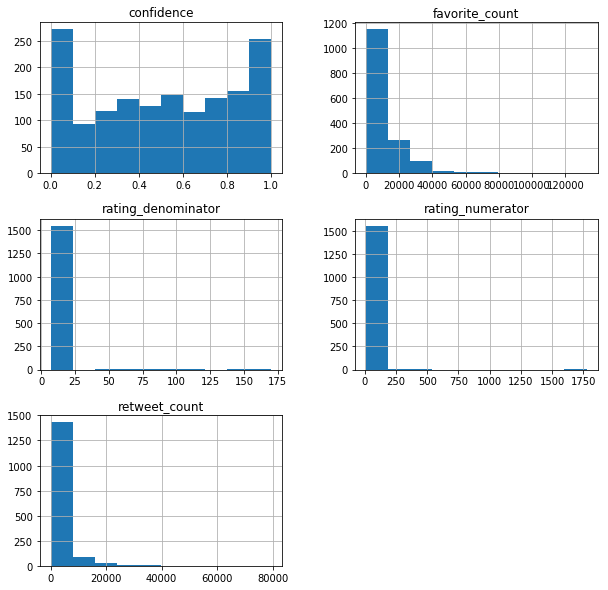

In [122]:
clean_t_archive.hist(figsize=(10,10));

### Visualization 2

####  Correlation Heat Map

Text(0.5,1,'Correlation Heat Map')

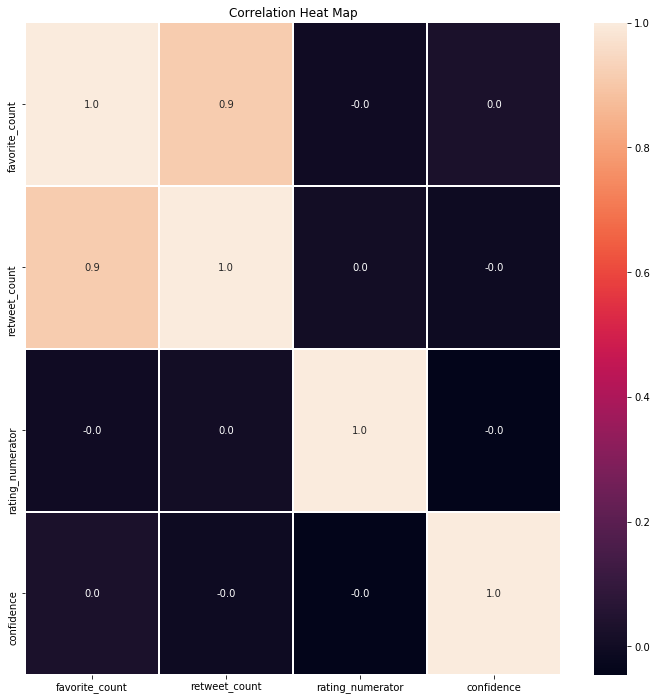

In [123]:
#put up a correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(clean_t_archive[['source','favorite_count','retweet_count',
               'rating_numerator','confidence']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map')

### Analyses
#### Strong correlation between favorites and retweets, this is expected.

### Visualization 3

#### Scatter plot between favorites and retweets.

Text(0.5,1,'Retweets and favorites Scatter plot')

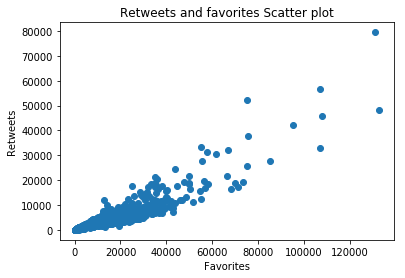

In [124]:
plt.scatter(clean_t_archive['favorite_count'], clean_t_archive['retweet_count'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

### Analyses
#### As expected there is a big positive (+0.9; shown by correlation heat map) correlation between the retweets and favorites.

### Visualization 4 


#### Data partition on basis of  dog_stage of dogs

(-1.2951169412248609,
 1.2369333432721308,
 -1.211613226703202,
 1.2099616753069853)

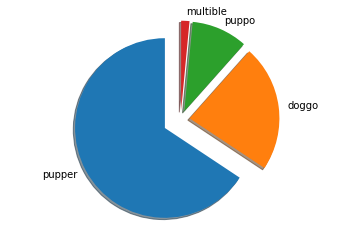

In [125]:
life_stage_count = list(clean_t_archive[clean_t_archive['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
life_stages = clean_t_archive[clean_t_archive['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(life_stage_count, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal')

### Analyses
#### Dogs in Pupper stage of dog life cycle get most tweets, which is expected.